# Distance Modulus and Emcee
##### Author: Felix Martinez

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

The file [lcparam_full_long.txt](https://github.com/dscolnic/Pantheon/blob/master/lcparam_full_long.txt) contains the following three columns: `zcmb`, `mb`, and `dmb`, which correspond to the ***redshift***, ***observed B-band magnitude***, and the ***error of the observed B-band magnitude*** of the Pantheon supernova Sample 

## Hubble Diagram
Draw the Hubble diagram using these data and their error bars, with the horizontal axis being the redshift z, the vertical axis being the distance modulus, defined as: 
$$
m_b - M_b = 5 \times \log_{10}\Big(\frac{D_L}{\text{Mpc}}\Big)+25
$$

For a Type Ia supernovae, $M_b$ = -19.3.

In [2]:
# first reading in the file
data = pd.read_csv("lcparam_full_long.txt", sep=" ")

# defining distance modulus
Mb = -19.3                        # (only for type 1a supernovea)
DM = data['mb'].to_numpy() - Mb

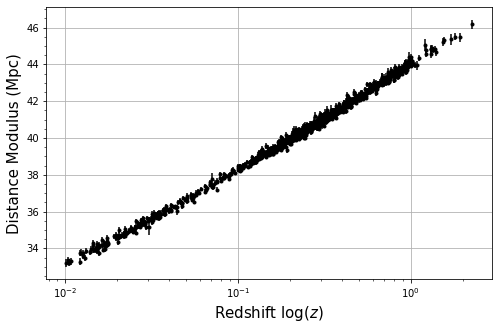

In [3]:
# creating the figure
plt.figure(figsize=[8,5])
plt.errorbar(x = data['zcmb'], y = DM, yerr = data['dmb'], fmt='.', color='black')
plt.grid()
plt.xlabel('Redshift $\log (z)$', size=15)
plt.ylabel('Distance Modulus (Mpc)', size=15)
plt.minorticks_on()
plt.xscale('log')
plt.savefig('Distance_modulus.png')
plt.show()

## Theoretical Distance Modulus Models
Over plot the corresponding theoretical distance modulus $\mu_{\text{LCDM}}$, assuming the following cosmological parameters:

* LCDM: $H_0 = 70$ km/sec, $\Omega_M = 0.3$, $\Omega_\Lambda = 0.7$
* LCDM: $H_0 = 70$ km/sec, $\Omega_M = 1.0$, $\Omega_\Lambda = 1.0$
* LCDM: $H_0 = 70$ km/sec, $\Omega_M = 0.3$, $\Omega_\Lambda = 0.0$

#### Distance Modulus:
*(equation 6.49 in Ryden)*
$$
m - M = 5\log_{10}\Big(\frac{d_L}{1 \text{ Mpc}}\Big) + 25
$$

#### Luminosity Distance:
*(equation 6.31 in Ryden)*
$$
d_L \approx \frac{c}{H_0}z\Big(1+\frac{(1-q_0)}{2}z\Big)
$$

#### Deceleration parameter: 
*(equation 6.11 in Ryden)*
$$
q_0 \approx \frac{1}{2}\Omega_{M,0}-\Omega_{\Lambda,0}
$$

In [4]:
c = 3e8 # speed of light constant

# Defining our equations
def q0(Om, Ol): # equation 6.11 in Ryden
    return (1/2) * Om - Ol

def d_l(x, H0, Om, Ol): # equation 6.31 in Ryden
    return ((c*x)/H0) * (1 + (1-q0(Om, Ol)) * x/2)

def distance_modulus(x, H0, Om, Ol): # equation 6.49 in Ryden
    # we are multiplying our H0 value by 1000 as we must convert the input
    # values of kilometers (km) to meters (m)
    return(5*np.log10(d_l(x, H0*1000, Om, Ol))) + 25

In [5]:
# making our models
LCDM1 = distance_modulus(data['zcmb'], 70, 0.3, 0.7)
LCDM2 = distance_modulus(data['zcmb'], 70, 1.0, 1.0)
LCDM3 = distance_modulus(data['zcmb'], 70, 0.3, 0)

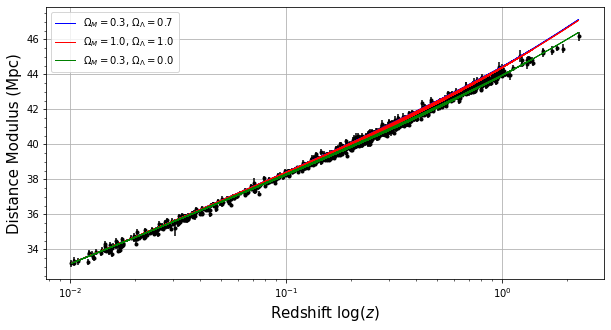

In [6]:
# creating the figure
plt.figure(figsize=[10,5])

#plotting the data
plt.errorbar(x = data['zcmb'], y = DM, yerr = data['dmb'], fmt='.', color='black') # raw data

# models
plt.errorbar(data['zcmb'],LCDM1,label = '$\Omega_M = 0.3$, $\Omega_\Lambda = 0.7$ ',linewidth=1,color='blue')
plt.errorbar(data['zcmb'],LCDM2,label = '$\Omega_M = 1.0$, $\Omega_\Lambda = 1.0$ ',linewidth=1,color='red')
plt.errorbar(data['zcmb'],LCDM3,label = '$\Omega_M = 0.3$, $\Omega_\Lambda = 0.0$ ',linewidth=1,color='green')

# making it pretty
plt.grid()
plt.xlabel('Redshift $\log (z)$', size=15)
plt.ylabel('Distance Modulus (Mpc)', size=15)
plt.minorticks_on()
plt.legend()
plt.xscale('log')
plt.savefig('Distance_modulus_functions.png')
plt.show()

### Showing the Residuals
Make the figures showing the difference of the distance modulus ($m_b – \mu_{\text{LCDM}}$) vs $z_\text{cmb}$.

In [56]:
# computing the residuals
resid1 = DM - LCDM1
resid2 = DM - LCDM2
resid3 = DM - LCDM3

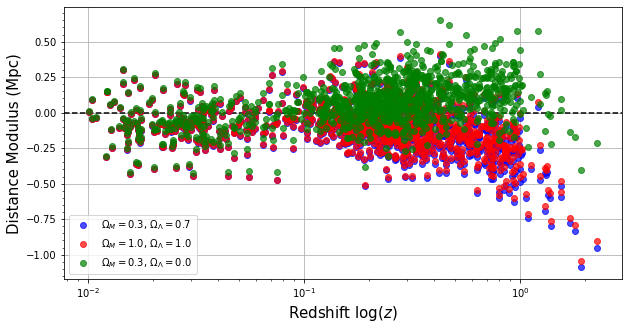

In [57]:
# creating the figure
plt.figure(figsize=[10,5])

# plotting the data (residuals)
plt.errorbar(data['zcmb'], resid1, label = '$\Omega_M = 0.3$, $\Omega_\Lambda = 0.7$ ', alpha = 0.7, 
             color='blue', fmt='o')
plt.errorbar(data['zcmb'], resid2, label = '$\Omega_M = 1.0$, $\Omega_\Lambda = 1.0$ ', alpha = 0.7, 
             color='red', fmt='o')
plt.errorbar(data['zcmb'], resid3, label = '$\Omega_M = 0.3$, $\Omega_\Lambda = 0.0$ ', alpha = 0.7, 
             color='green', fmt='o')

# making it pretty
plt.grid()
plt.axhline(0, c='black',linestyle='--')
plt.xlabel('Redshift $\log (z)$', size=15)
plt.ylabel('Distance Modulus (Mpc)', size=15)
plt.minorticks_on()
plt.legend()
plt.xscale('log')
plt.savefig('Distance_Modulus_residuals.png')
plt.show()

### Cosmological Redshift vs. Heliocentric Redshift

Explain why we should use `zcmb` for cosmological modeling, not the redshifts measured in the heliocentric reference system (`zhel` in the data file).

-------------------------

`zhel` is a measured redshift in the heliocentric frame, meaning it includes the redshift caused by our motion around the sun and around the Milky Way. `zcmb`, on the other hand, is the "corrected" redshift that removes this bias of motion and instead is a better measurment of the true cosmological distance an object is away from us. We use `zcmb` in cosmological modeling because it is more accurate to the cosmological distance than `zhel` (However for this dataset `zhel` is approximated to equal `zcmb` which is not always true).

### Chi-Squared

Write down the formula for calculating the Chi-Square of the differences between the data and the model, with the errors of the data points included.

-------------------------
$$
X^2 = \sum_i \frac{(\mu_i - \mu(z_i))^2}{a_i^2}
$$

Where $a_i^2$ is the error squared, $\mu_i$ are our observed values, and $\mu(z_i)$ are our expected values

In [9]:
def chi_squared(modle, measured, error, args):
    top = (measured - modle(*args))**2
    bot = error**2
    return (np.sum(top/bot))

## Modeling our Distance Modulus with emcee
#### Run cosmological fits using the program emcee to search for the parameters ($H_0$, $\Omega_M$, and $\Omega_\Lambda$) that will fit the data the best.

* Download emcee and use the tutorial to learn how it works using the demo problems shown in the tutorial document, make the corresponding demo figures.
* Derive the optimal fit using the LCDM model and derive the estimates of $H_0$, $\Omega_M$, and $\Omega_\Lambda$. 
* Show the corresponding corner plots of the results. 

---

### *Emcee Tutorial:* 

For this problem, we will be using 2 emcee tutorials, the first from the [Emcee and the Model Interface](https://lmfit.github.io/lmfit-py/examples/example_emcee_Model_interface.html) tutorial, the second from [readthedocs.io](https://emcee.readthedocs.io/en/stable/tutorials/line/) tutorial.

---

### *Modifying the tutorial for our Data*

We are going to have priors of our variables $H_0$, and $\Omega_M$ to be:
* $H_0$ : [60-80] km/s/Mpc
* $\Omega_M$: [0-1]

---

For modeling we will have a slightly altered `distance_modulus` equation that instead has $\Omega_\Lambda = 1 - \Omega_M$. This is for a flat universe model where $\Lambda = 0$, and $\Omega_\Lambda + \Omega_M = 1$.

In [10]:
c = 3e8 # speed of light constant

# Defining our equations
def q0(Om, Ol): # equation 6.11 in Ryden
    return (1/2) * Om - Ol

def d_l(x, H0, Om, Ol): # equation 6.31 in Ryden
    return ((c*x)/H0) * (1 + (1-q0(Om, Ol)) * x/2)

def distance_modulus(x, H0, Om): # equation 6.49 in Ryden
    Ol = 1 - Om
    return(5*np.log10(d_l(x, H0*1000, Om, Ol))) + 25

### *Modeling Attempt 1*

For this first section, we will be using the [Emcee and the Model Interface](https://lmfit.github.io/lmfit-py/examples/example_emcee_Model_interface.html) tutorial.

In [11]:
# importing packages
import lmfit
import emcee

# Recall our old distance_modulus equation used in part b
model = lmfit.Model(distance_modulus)

# inital conditions of what we thing our best fit is
p = model.make_params(H0=70, Om=0.3)

[[Fit Statistics]]
    # fitting method   = Nelder-Mead
    # function evals   = 87
    # data points      = 1048
    # variables        = 2
    chi-square         = 23.9561201
    reduced chi-square = 0.02290260
    Akaike info crit   = -3955.77896
    Bayesian info crit = -3945.86968
[[Variables]]
    H0:  69.8617460 +/- 0.26124813 (0.37%) (init = 70)
    Om:  0.59322356 +/- 0.01632120 (2.75%) (init = 0.3)
[[Correlations]] (unreported correlations are < 0.100)
    C(H0, Om) = -0.818


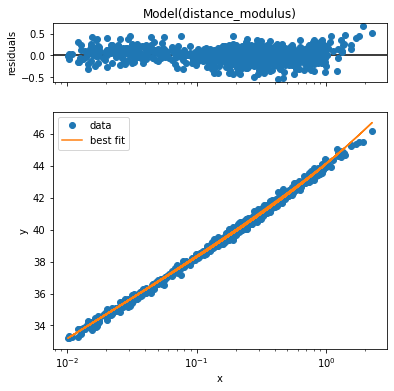

In [12]:
# fitting our model with the Nelder method
result = model.fit(data=DM, params=p, x=data['zcmb'], method='Nelder', nan_policy='omit')

# graphing the results
lmfit.report_fit(result)
result.plot()
plt.xscale('log')

In [13]:
# conditions in running emcee
emcee_kws = dict(steps=5000, burn=500, thin=20, is_weighted=False,
                 progress=True)

# copying the results of our first fit to emcee
emcee_params = result.params.copy()

# adding constraints to our initial conditions
emcee_params.add('__lnsigma', value=np.log(0.1), min=np.log(0.001), max=np.log(2.0))
emcee_params.add('H0', value=result.params.copy()['H0'].value, min=60, max=80)
emcee_params.add('Om', value=result.params.copy()['Om'].value, min=0, max=1)

In [14]:
# printing out our inital conditions
emcee_params

name,value,initial value,min,max,vary
H0,69.8617460,69.86174599556435,60.0000000,80.0000000,True
Om,0.59322356,0.593223560249398,0.00000000,1.00000000,True
__lnsigma,-2.30258509,-2.3025850929940455,-6.90775528,0.69314718,True


In [15]:
result_emcee = model.fit(data=DM, x=data['zcmb'], params=emcee_params, method='emcee',
                         nan_policy='omit', fit_kws=emcee_kws)

100%|██████████| 5000/5000 [00:34<00:00, 144.54it/s]


Printing out our results of our emcee fit

In [16]:
lmfit.report_fit(result_emcee)

[[Fit Statistics]]
    # fitting method   = emcee
    # function evals   = 500000
    # data points      = 1048
    # variables        = 3
    chi-square         = 1045.04907
    reduced chi-square = 1.00004696
    Akaike info crit   = 3.04490559
    Bayesian info crit = 17.9088222
[[Variables]]
    H0:         69.8647096 +/- 0.26149737 (0.37%) (init = 69.86175)
    Om:         0.59304835 +/- 0.01639698 (2.76%) (init = 0.5932236)
    __lnsigma: -1.88779758 +/- 0.02169809 (1.15%) (init = -2.302585)
[[Correlations]] (unreported correlations are < 0.100)
    C(H0, Om) = -0.812


The time it took for us to run emcee and its acceptance fraction

Text(0, 0.5, 'acceptance fraction')

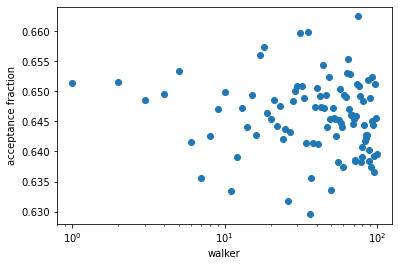

In [17]:
plt.plot(result_emcee.acceptance_fraction, 'o')
plt.xscale('log')
plt.xlabel('walker')
plt.ylabel('acceptance fraction')

In [18]:
if hasattr(result_emcee, "acor"):
    print("Autocorrelation time for the parameters:")
    print("----------------------------------------")
    for i, p in enumerate(result.params):
        print(f'{p} = {result_emcee.acor[i]:.3f}')

Autocorrelation time for the parameters:
----------------------------------------
H0 = 38.227
Om = 38.456


Our final results for ***Modeling Attempt 1***:

/Users/felix/anaconda3/envs/grizli/lib/python3.6/site-packages/lmfit/model.py:1893: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.axes(**ax_kws)


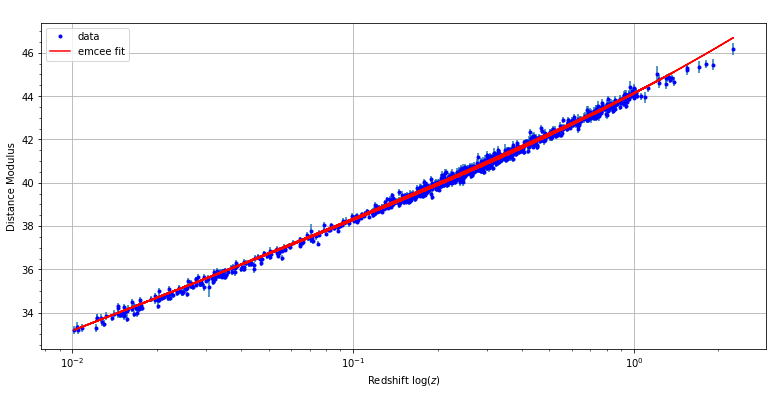

In [19]:
# plotting our emcee Model
plt.figure(figsize=[13,6])

result_emcee.plot_fit(datafmt='b.',fitfmt='r-', title=' ')
result_emcee.plot_fit(datafmt=' ', fitfmt=' ', yerr=data['dmb'],
                     xlabel='Redshift $\log(z)$', ylabel='Distance Modulus')

labels=['data','emcee fit']
plt.legend(labels)
plt.grid()
plt.minorticks_on()
plt.xscale('log')

plt.savefig('lmfit_emcee.png')
plt.show()

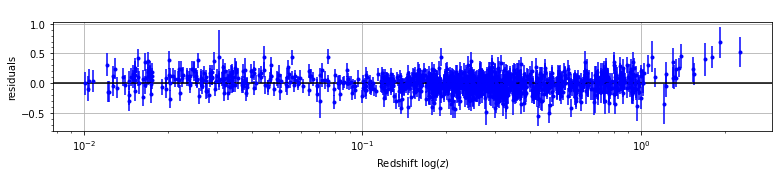

In [20]:
# Plotting our Residuals
plt.figure(figsize=[12.9,2])
result_emcee.plot_residuals(title = ' ',yerr=data['dmb'],datafmt='b.')
plt.minorticks_on()
plt.grid()
plt.xscale('log')
plt.xlabel('Redshift $\log(z)$')
plt.savefig('lmfit_resid.png')
plt.show()

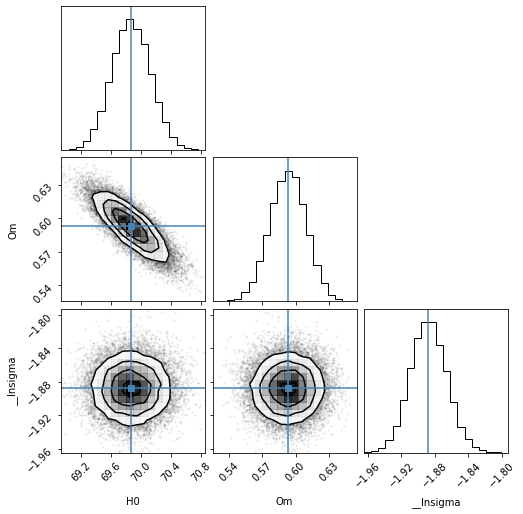

In [21]:
import corner

emcee_corner = corner.corner(result_emcee.flatchain, labels=result_emcee.var_names,
                             truths=list(result_emcee.params.valuesdict().values()))
plt.savefig('lmfit_corner_plot.png')
plt.show()

In [22]:
print("\nmedian of posterior probability distribution")
print('--------------------------------------------')
lmfit.report_fit(result_emcee.params)


median of posterior probability distribution
--------------------------------------------
[[Variables]]
    H0:         69.8647096 +/- 0.26149737 (0.37%) (init = 69.86175)
    Om:         0.59304835 +/- 0.01639698 (2.76%) (init = 0.5932236)
    __lnsigma: -1.88779758 +/- 0.02169809 (1.15%) (init = -2.302585)
[[Correlations]] (unreported correlations are < 0.100)
    C(H0, Om) = -0.812


In [23]:
highest_prob = np.argmax(result_emcee.lnprob)
hp_loc = np.unravel_index(highest_prob, result_emcee.lnprob.shape)
mle_soln = result_emcee.chain[hp_loc]
print("\nMaximum Likelihood Estimation (MLE):")
print('----------------------------------')
for ix, param in enumerate(emcee_params):
    print(f"{param}: {mle_soln[ix]:.3f}")

    
print('Ol:', round(1- result_emcee.params['Om'].value,3))


Maximum Likelihood Estimation (MLE):
----------------------------------
H0: 69.866
Om: 0.593
__lnsigma: -1.888
Ol: 0.407


### *Modeling Attempt 2*

This time we will be using the emcee tutorial from [readthedocs.io](https://emcee.readthedocs.io/en/stable/tutorials/line/).

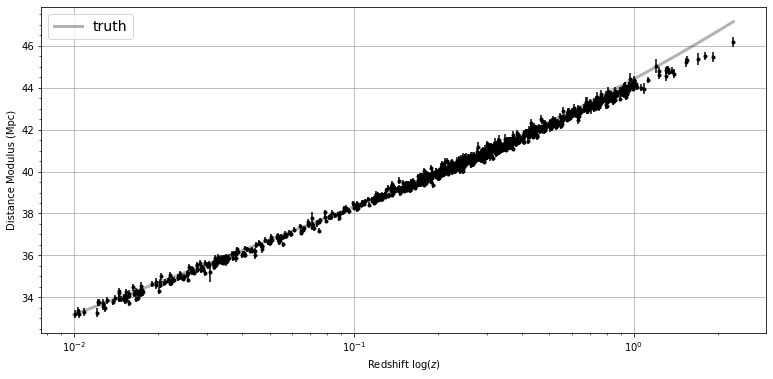

In [24]:
# Our inital input data, see the first plot for more details
y = DM
yerr = data['dmb']
x = data['zcmb']

# The redshift range we will be plotting
x0 = np.linspace(0.01, 2.27, 500)

# initial values we will be compairing
H0=70
Om=0.3

# creating the figure
plt.figure(figsize=[13,6])
plt.errorbar(x = x, y = y, yerr = yerr, fmt='.', color='black')
plt.plot(x0, distance_modulus(x0, H0, Om), "k", alpha=0.3, lw=3, label="truth")
plt.grid()
plt.legend(fontsize=14)
plt.xlabel('Redshift $\log(z)$')
plt.ylabel('Distance Modulus (Mpc)')
plt.minorticks_on()
plt.xscale('log')
plt.show()

Where **truth** is our `distance_modulus` equation with our inital values

Least-squares estimates:
H0 = 69.862 ± 0.259
Om = 0.593 ± 0.016
Ol = 0.407 ± 0.016

Our Chi-Squared value for Least-Squares estimate is:
X^2: 1119.613


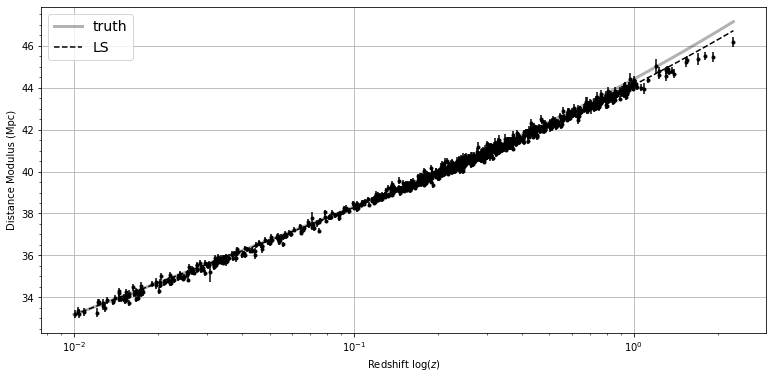

In [25]:
# using optimize.curve_fit to find inital values for H0, Om, Ol
from scipy import optimize

fit, pcov = optimize.curve_fit(distance_modulus, xdata = x, ydata = y, bounds=([60,0],[80,1]))
err = np.sqrt(np.diag(pcov)) # finds the error after doing least_squares

# printing our our estimates
print("Least-squares estimates:")
print("H0 = {0:.3f} ± {1:.3f}".format(fit[0], err[0]))
print("Om = {0:.3f} ± {1:.3f}".format(fit[1], err[1]))
print("Ol = {0:.3f} ± {1:.3f}".format(1 - fit[1], err[1]))

# finding out chi-squared value
LS_chi = chi_squared(distance_modulus, DM, data['dmb'], [data['zcmb'], fit[0], fit[1]])
print('\nOur Chi-Squared value for Least-Squares estimate is:')
print('X^2:',round(LS_chi,4))

# plotting our image
plt.figure(figsize=[13,6])
plt.errorbar(x, y, yerr=yerr, fmt=".k", capsize=0)
plt.plot(x0, distance_modulus(x0, H0, Om), "k", alpha=0.3, lw=3, label="truth")
plt.plot(x0, distance_modulus(x0, fit[0], fit[1]), "--k", label="LS")
plt.legend(fontsize=14)
plt.minorticks_on()
plt.grid()
plt.ylabel('Distance Modulus (Mpc)')
plt.xlabel('Redshift $\log(z)$')
plt.xscale('log');

As we are measuring the error on real measured data, we do not need to include any error on our model so we will comment out everything on `sigma2` other than `yerr ** 2`

In [26]:
def log_likelihood(theta, x, y, yerr):
    H0, Om = theta
    model = distance_modulus(x, H0, Om)
    sigma2 = yerr ** 2 #+ model ** 2 * np.exp(2 * log_f)
    return -0.5 * np.sum((y - model) ** 2 / sigma2 + np.log(sigma2))

Maximum likelihood estimates:
H0 = 70.271
Om = 0.566
Ol = 0.434

Our Chi-Squared value for Maximum likelihood estimate is:
X^2: 1116.3938


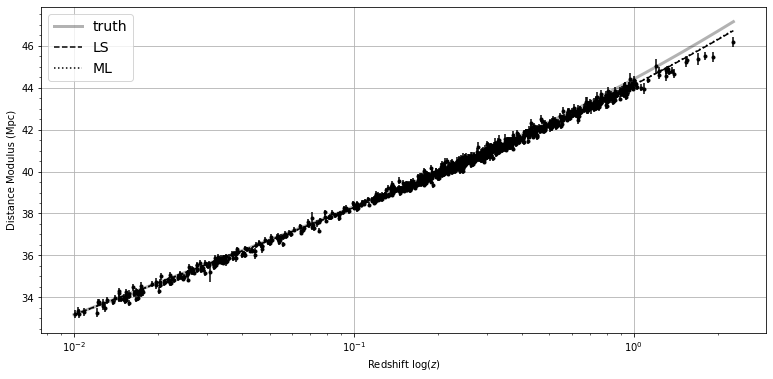

In [27]:
from scipy.optimize import minimize

np.random.seed(42)
nll = lambda *args: -log_likelihood(*args)
initial = np.array([H0, Om])
soln = minimize(nll, initial, args=(x, y, yerr))
H0_ml, Om_ml  = soln.x

# printing out our estimates
print("Maximum likelihood estimates:")
print("H0 = {0:.3f}".format(H0_ml))
print("Om = {0:.3f}".format(Om_ml))
print("Ol = {0:.3f}".format(1-Om_ml))

# finding out our chi-squared values
ML_chi = chi_squared(distance_modulus, DM, data['dmb'], [data['zcmb'], H0_ml, Om_ml])
print('\nOur Chi-Squared value for Maximum likelihood estimate is:')
print('X^2:',round(ML_chi,4))

# plotting our image
plt.figure(figsize=[13,6])
plt.errorbar(x, y, yerr=yerr, fmt=".k", capsize=0)
plt.plot(x0, distance_modulus(x0, H0, Om), "k", alpha=0.3, lw=3, label="truth")
plt.plot(x0, distance_modulus(x0, fit[0], fit[1]), "--k", label="LS")
plt.plot(x0, distance_modulus(x0, H0_ml, Om_ml), ":k", label="ML")
plt.legend(fontsize=14)

plt.minorticks_on()
plt.grid()
plt.xscale('log')
plt.ylabel('Distance Modulus (Mpc)')
plt.xlabel('Redshift $\log(z)$');

In [28]:
# including our bounds on our log_prior function
def log_prior(theta):
    H0, Om = theta
    if 60.0 < H0 < 80.0 and 0.0 < Om < 1.0:
        return 0.0
    return -np.inf

In [29]:
def log_probability(theta, x, y, yerr):
    lp = log_prior(theta)
    if not np.isfinite(lp):
        return -np.inf
    return lp + log_likelihood(theta, x, y, yerr)

In [30]:
import emcee

pos = soln.x + 1e-4 * np.random.randn(32, 2)

nwalkers, ndim = pos.shape

# this will take slightly longer than the first method of emcee fitting
sampler = emcee.EnsembleSampler(nwalkers, ndim, log_probability, args=(x, y, yerr))
sampler.run_mcmc(pos, 5000, progress=True);

100%|██████████| 5000/5000 [03:11<00:00, 26.15it/s]


Showing the random walk our emcee fit produced

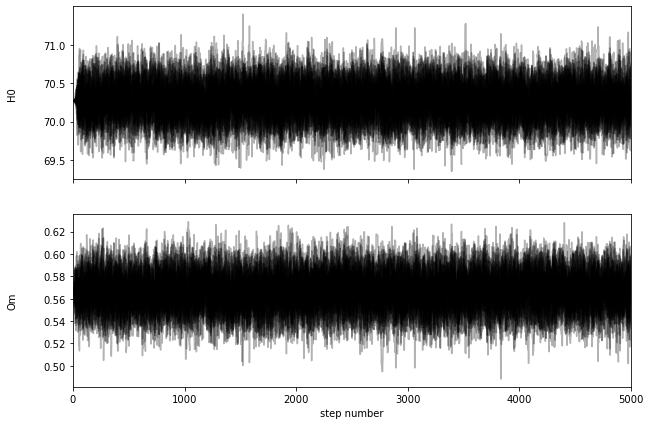

In [31]:
fig, axes = plt.subplots(2, figsize=(10, 7), sharex=True)
samples = sampler.get_chain()
labels = ["H0", "Om"]
for i in range(ndim):
    ax = axes[i]
    ax.plot(samples[:, :, i], "k", alpha=0.3)
    ax.set_xlim(0, len(samples))
    ax.set_ylabel(labels[i])
    ax.yaxis.set_label_coords(-0.1, 0.5)

axes[-1].set_xlabel("step number");

In [32]:
tau = sampler.get_autocorr_time()
print(tau)

[32.55131061 33.18445322]


In [33]:
flat_samples = sampler.get_chain(discard=100, thin=15, flat=True)
print(flat_samples.shape)

(10432, 2)


Our final results for ***Modeling Attempt 2***:

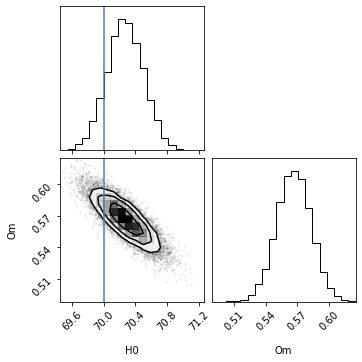

In [34]:
import corner

fig = corner.corner(flat_samples, labels=labels, truths=[H0, Om]);
plt.savefig('corner_plot.png')
plt.show()

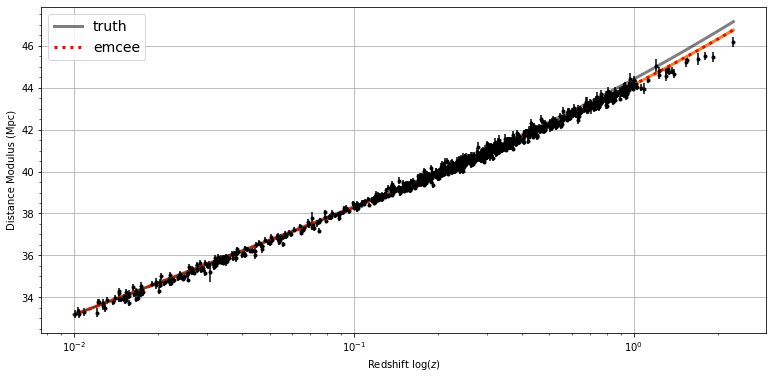

In [35]:
inds = np.random.randint(len(flat_samples), size=100)

# choosing 100 random samples of our fit and plotting them 
plt.figure(figsize=[13,6])
for ind in inds:
    sample = flat_samples[ind]
    plt.plot(x0, distance_modulus(x0, sample[0], sample[1]), "C1", alpha=0.1)
plt.errorbar(x, y, yerr=yerr, fmt=".k", capsize=0)

# Finding the 50th percentile of our fits and using that for our emcee values
H0_emcee = np.percentile(flat_samples[:, 0], [50])
Om_emcee = np.percentile(flat_samples[:, 1], [50])
Ol_emcee = 1- Om_emcee

# plotting our initial model and our emcee model
plt.plot(x0, distance_modulus(x0, H0, Om), "k", alpha=0.5, lw=3, label="truth")
plt.plot(x0, distance_modulus(x0, H0_emcee, Om_emcee), lw=3, label="emcee", c = 'red', linestyle= ':')

plt.legend(fontsize=14)
plt.minorticks_on()
plt.grid()
plt.xscale('log')
plt.ylabel('Distance Modulus (Mpc)')
plt.xlabel('Redshift $\log(z)$')
plt.savefig('emcee_fit.png');

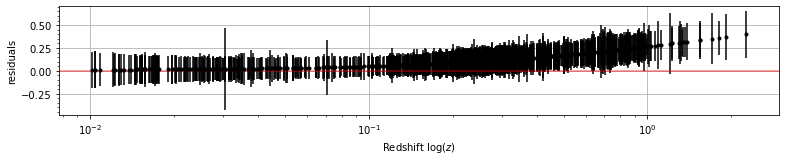

In [36]:
# plotting our residuals
plt.figure(figsize=[12.9,2])

# finding the residuals
resid = distance_modulus(x, H0, Om) - distance_modulus(x, H0_emcee, Om_emcee)

plt.axhline(0, c = 'red', alpha = 0.5)
plt.errorbar(x = x, y = resid, yerr= data['dmb'], fmt = '.', c = 'black')

plt.minorticks_on()
plt.grid()
plt.xscale('log')
plt.xlabel('Redshift $\log(z)$')
plt.ylabel('residuals')
plt.savefig('emcee_resid.png')
plt.show()

Notice that our fitted distance modulus function seems to not correctly fit our data starting around redshift $z \sim 0.5$ onward. This is due to our own definition of the `distance_modulus` function. Recall the following functions:

#### Distance Modulus:
*(equation 6.49 in Ryden)*
$$
m - M = 5\log_{10}\Big(\frac{d_L}{1 \text{ Mpc}}\Big) + 25
$$

#### Luminosity Distance:
*(equation 6.31 in Ryden)*
$$
d_L \approx \frac{c}{H_0}z\Big(1+\frac{(1-q_0)}{2}z\Big)
$$

#### Deceleration parameter: 
*(equation 6.11 in Ryden)*
$$
q_0 = \frac{1}{2}\Omega_{M,0}-\Omega_{\Lambda,0}
$$

Our ***Deceleration parameter***, `q_0`, is not quite accurate. The defined function only is valid when $z \ll 1$, this is because it is the *Taylor Expansion* of it's actual equation. As our data approaches $z \rightarrow 1$ and on wards, our `distance_modulus` function fails to accurately fit it because of this inital approximation. To solve this problem, we will have to not estimate `q_0` and instead use it's exact value. This same relationship can also be seen (less so) when running the first tutorial method *Emcee and the Module Interface*, and also in our inital first residual graph when plotting our first LCDM models.

In [37]:
from IPython.display import display, Math

for i in range(ndim):
    mcmc = np.percentile(flat_samples[:, i], [16, 50, 84])
    q = np.diff(mcmc)
    txt = "\mathrm{{{3}}} = {0:.3f}_{{-{1:.3f}}}^{{{2:.3f}}}"
    txt = txt.format(mcmc[1], q[0], q[1], labels[i])
    display(Math(txt))

    
mcmc = np.percentile(flat_samples[:, 1], [16, 50, 84])
q = np.diff(mcmc)
txt = "\mathrm{{{3}}} = {0:.3f}_{{-{1:.3f}}}^{{{2:.3f}}}"
txt = txt.format(1-mcmc[1], q[0], q[1], 'Ol')
display(Math(txt))


# finding our chi-squared value
H0_emcee = np.percentile(flat_samples[:, 0], [50])
Om_emcee = np.percentile(flat_samples[:, 1], [50])

emcee_chi = chi_squared(distance_modulus, DM, data['dmb'], [data['zcmb'], H0_emcee, Om_emcee])
print('\nOur Chi-Squared value for our emcee fit is:')
print('X^2:',round(emcee_chi,4))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>


Our Chi-Squared value for our emcee fit is:
X^2: 1116.394


As our `q_0` function is approximated (look at reasons above), the result of our fit includes Mass as having a higher weight in the density of our universe. Our fit results in an $\Omega_M \sim 0.56$ while the actual value we should see is an $\Omega_M \sim 0.3$, this means that the model we fitted has mass as having more of an affect in how our universe expands.

### Using a different `distance_modulus` equation

As our own `distance_modulus` equation is only valid for $z \ll 1$, we must use a more accurate equation to survey the redshift range we are currently observing, we can do this with the `astropy.cosmology` function, `FlatLambdaCDM`. Viewing [docs.astropy.org](https://docs.astropy.org/en/stable/api/astropy.cosmology.FlatLambdaCDM.html) may be useful for understanding how to use `FlatLambdaCdm`.

In [38]:
from astropy.cosmology import FlatLambdaCDM

H0 = 70 # Hubble Constant km/s/MPC
Om = 0.3 # Omega Matter
#Ode = 0 # Omega Dark Energy (we must include as our redshift > 1), only for LambdaCDM

# creating our CDM model
cosmo = FlatLambdaCDM(H0=H0, Om0=Om)#,Ode0=Ode)

Now that we have our CDM model, `cosmo`, we can use `.luminosity_distance(z)` to find the luminosity distance of our observed redshifts. We can then use these results to find our ***Distance Modulus*** in the equation:

$$
DM = 5 \log(D_L) + 25
$$

In [39]:
# finding luminosity distance
Dl = cosmo.luminosity_distance(data['zcmb']).value

# finding distance modulus
dist_mod = 5*np.log10(Dl) + 25

#### Plotting our results for our new distance modulus equation

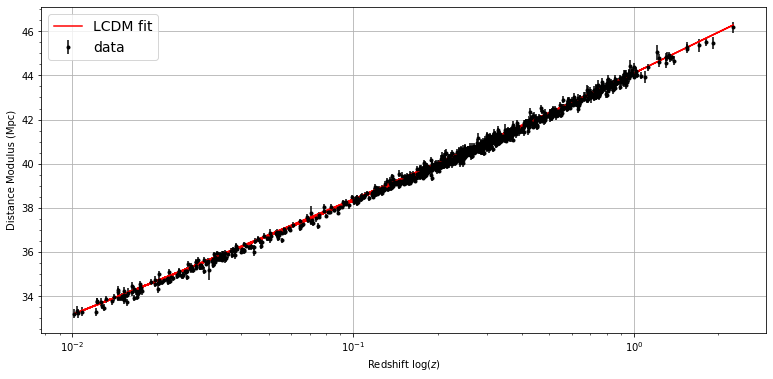

In [40]:
plt.figure(figsize=[13,6])

plt.errorbar(x=data['zcmb'], y=dist_mod,fmt='-',c='r', label = 'LCDM fit')
plt.errorbar(x=data['zcmb'], y=DM,yerr=data['dmb'],fmt='.',c = 'black', label='data')

plt.grid()
plt.legend(fontsize=14)
plt.xlabel('Redshift $\log(z)$')
plt.ylabel('Distance Modulus (Mpc)')
plt.minorticks_on()
plt.xscale('log')
plt.show()

These are good results. We now can write a function, `distance_modulus_LCDM` that takes in $z$, $H_0$ and $\Omega_M$ as arguments so we can fit it with the **emcee** module.

In [41]:
def distance_modulus_LCDM(x, H0, Om, Flat = True):
    '''
    x: Redshift array
    H0: Hubble Constant, must be in km/sec/MPC
    Om: Omega Matter, must scale from 0-1
    ---------------------------------------------------------
    returns: An array that includes our distance modulus value, 
             will be the same length as 'x' (our redshift).
    '''
    from astropy.cosmology import LambdaCDM, FlatLambdaCDM
    
    if Flat == True:
        # creating the LCDM model for Flat Universe
        cosmo = FlatLambdaCDM(H0=H0, Om0=Om)
        
        
    if Flat == False:
        # creating the LCDM model for Non-Flat Universe
        cosmo = LambdaCDM(H0=H0, Om0=Om, Od0=0)
    
    # finding luminosity distance
    Dl = cosmo.luminosity_distance(x).value

    # finding distance modulus
    dist_mod = 5*np.log10(Dl) + 25
    
    return(dist_mod)

### *Now running through the `readthedocs.io` example*

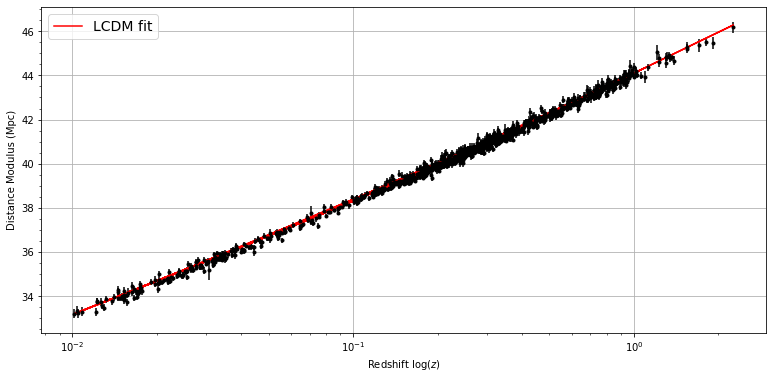

In [42]:
# Our inital input data, see the first plot for more details
x = data['zcmb']
y = DM
yerr = data['dmb']

# The redshift range we will be plotting
x0 = np.linspace(0.01, 2.27, 500)

# initial values we will be compairing
H0=70
Om=0.3

# creating the figure
plt.figure(figsize=[13,6])
plt.errorbar(x=data['zcmb'], y=distance_modulus_LCDM(x, H0, Om),fmt='-',c='r', label = 'LCDM fit')
plt.errorbar(x = x, y = y, yerr = yerr, fmt='.', color='black')
plt.grid()
plt.legend(fontsize=14)
plt.xlabel('Redshift $\log(z)$')
plt.ylabel('Distance Modulus (Mpc)')
plt.minorticks_on()
plt.xscale('log')
plt.show()

Least-squares estimates:
H0 = 71.668 ± 0.239
Om = 0.283 ± 0.012
Ol = 0.717 ± 0.012

Our Chi-Squared value for Least-Squares estimate is:
X^2: 1036.8635


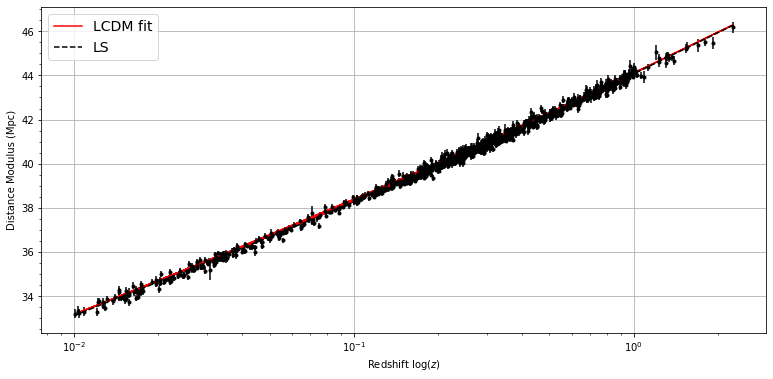

In [43]:
# using optimize.curve_fit to find inital values for H0, Om, Ol
from scipy import optimize

fit, pcov = optimize.curve_fit(distance_modulus_LCDM, xdata = x, ydata = y, bounds=([60,0],[80,1]))
err = np.sqrt(np.diag(pcov)) # finds the error after doing least_squares fitting

# printing our our estimates
print("Least-squares estimates:")
print("H0 = {0:.3f} ± {1:.3f}".format(fit[0], err[0]))
print("Om = {0:.3f} ± {1:.3f}".format(fit[1], err[1]))
print("Ol = {0:.3f} ± {1:.3f}".format(1 - fit[1], err[1]))

# finding out chi-squared value
LS_chi = chi_squared(distance_modulus_LCDM, DM, data['dmb'], [data['zcmb'], fit[0], fit[1]])
print('\nOur Chi-Squared value for Least-Squares estimate is:')
print('X^2:',round(LS_chi,4))

# plotting our image
plt.figure(figsize=[13,6])

plt.errorbar(x=data['zcmb'], y=dist_mod,fmt='-',c='r', label = 'LCDM fit')
plt.errorbar(x0, distance_modulus_LCDM(x0, fit[0], fit[1]), c="k", 
             linestyle='--', label="LS")
plt.errorbar(x, y, yerr=yerr, fmt=".k", capsize=0)

plt.legend(fontsize=14)
plt.minorticks_on()
plt.grid()
plt.ylabel('Distance Modulus (Mpc)')
plt.xlabel('Redshift $\log(z)$')
plt.xscale('log');

We must change the `model` in our `log_likelihood` function and change the bounds in our `log_prior` function, otherwise, everything else will stay the same.

In [44]:
def log_likelihood(theta, x, y, yerr):
    H0, Om = theta
    model = distance_modulus_LCDM(x, H0, Om)
    sigma2 = yerr ** 2 #+ model ** 2 * np.exp(2 * log_f)
    return -0.5 * np.sum((y - model) ** 2 / sigma2 + np.log(sigma2))

# including our bounds on our log_prior function
def log_prior(theta):
    H0, Om = theta
    if 60.0 < H0 < 80.0 and 0.0 < Om < 1.0:
        return 0.0
    return -np.inf

def log_probability(theta, x, y, yerr):
    lp = log_prior(theta)
    if not np.isfinite(lp):
        return -np.inf
    return lp + log_likelihood(theta, x, y, yerr)

Maximum likelihood estimates:
H0 = 71.800
Om = 0.285
Ol = 0.715

Our Chi-Squared value for Maximum likelihood estimate is:
X^2: 1035.6792


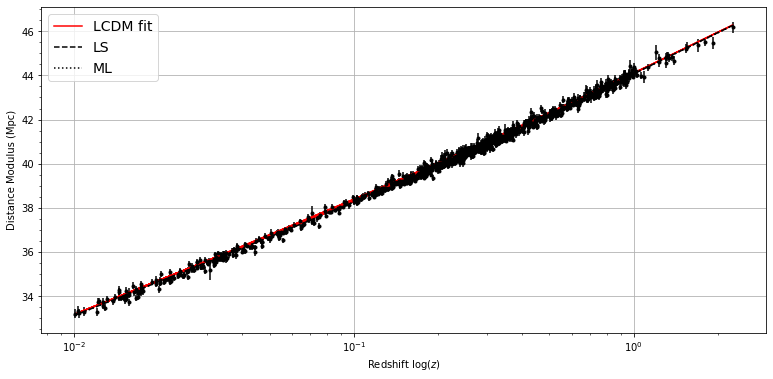

In [45]:
from scipy.optimize import minimize

np.random.seed(42)
nll = lambda *args: -log_likelihood(*args)
initial = np.array([H0, Om])
soln = minimize(nll, initial, args=(x, y, yerr), bounds = ([60,80],[0,1]))
H0_ml, Om_ml  = soln.x

# printing out our estimates
print("Maximum likelihood estimates:")
print("H0 = {0:.3f}".format(H0_ml))
print("Om = {0:.3f}".format(Om_ml))
print("Ol = {0:.3f}".format(1-Om_ml))

# finding out our chi-squared values
ML_chi = chi_squared(distance_modulus_LCDM, DM, data['dmb'], [data['zcmb'], H0_ml, Om_ml])
print('\nOur Chi-Squared value for Maximum likelihood estimate is:')
print('X^2:',round(ML_chi,4))

# plotting our image
plt.figure(figsize=[13,6])

plt.errorbar(x=data['zcmb'], y=dist_mod,fmt='-',c='r', label = 'LCDM fit')
plt.errorbar(x0, distance_modulus_LCDM(x0, fit[0], fit[1]), c = "k", linestyle = '--', label="LS")
plt.errorbar(x0, distance_modulus_LCDM(x0, H0_ml, Om_ml), c =  "k", linestyle = ':', label="ML")
plt.errorbar(x, y, yerr=yerr, fmt=".k", capsize=0)

plt.legend(fontsize=14)
plt.minorticks_on()
plt.grid()
plt.xscale('log')
plt.ylabel('Distance Modulus (Mpc)')
plt.xlabel('Redshift $\log(z)$');

In [46]:
import emcee

pos = soln.x + 1e-4 * np.random.randn(32, 2)

nwalkers, ndim = pos.shape

sampler = emcee.EnsembleSampler(nwalkers, ndim, log_probability, args=(x, y, yerr))
sampler.run_mcmc(pos, 5000, progress=True);

100%|██████████| 5000/5000 [02:36<00:00, 32.03it/s]


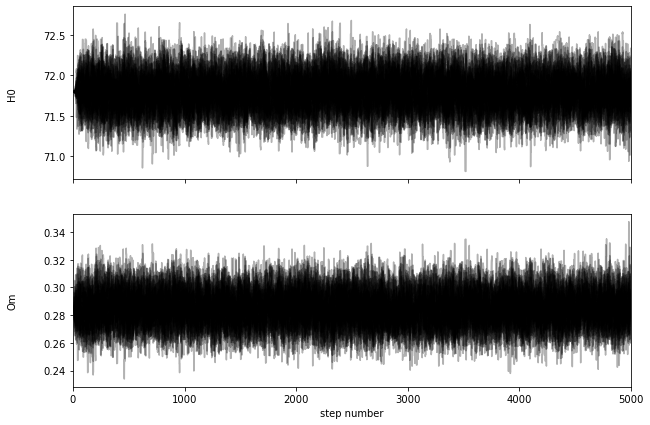

In [47]:
fig, axes = plt.subplots(2, figsize=(10, 7), sharex=True)
samples = sampler.get_chain()
labels = ["H0", "Om"]
for i in range(ndim):
    ax = axes[i]
    ax.plot(samples[:, :, i], "k", alpha=0.3)
    ax.set_xlim(0, len(samples))
    ax.set_ylabel(labels[i])
    ax.yaxis.set_label_coords(-0.1, 0.5)

axes[-1].set_xlabel("step number");

In [48]:
tau = sampler.get_autocorr_time()
print(tau)

[31.17227665 29.57270307]


In [49]:
flat_samples = sampler.get_chain(discard=100, thin=15, flat=True)
print(flat_samples.shape)

(10432, 2)


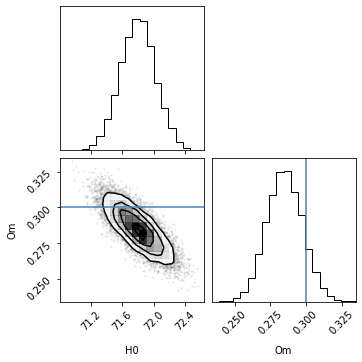

In [50]:
import corner

fig = corner.corner(flat_samples, labels=labels, truths=[H0, Om])
plt.savefig('lcdm_cornder_plot.png')
plt.show()

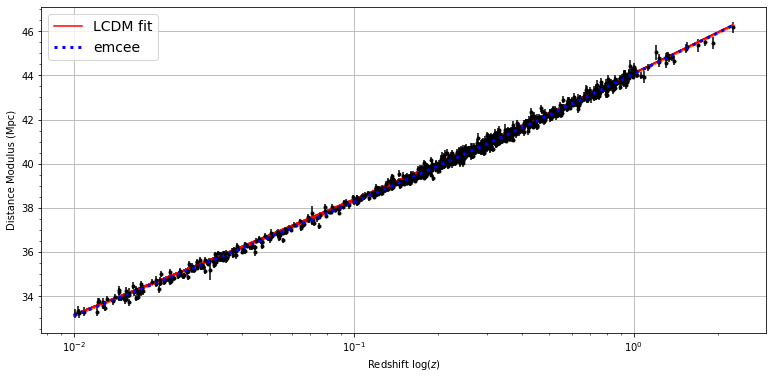

In [51]:
inds = np.random.randint(len(flat_samples), size=100)

# choosing 100 random samples of our fit and plotting them 
plt.figure(figsize=[13,6])

for ind in inds:
    sample = flat_samples[ind]
    plt.plot(x0, distance_modulus_LCDM(x0, sample[0], sample[1]), "C1", alpha=0.1)

# Finding the 50th percentile of our fits and using that for our emcee values
H0_emcee = np.percentile(flat_samples[:, 0], [50])[0]
Om_emcee = np.percentile(flat_samples[:, 1], [50])
Ol_emcee = 1- Om_emcee

# plotting our initial model and our emcee model
plt.errorbar(x=data['zcmb'], y=dist_mod,fmt='-',c='r', label = 'LCDM fit')
plt.errorbar(x, y, yerr=yerr, fmt=".k", capsize=0)
plt.errorbar(x0, distance_modulus_LCDM(x0, H0_emcee, Om_emcee), lw=3, label="emcee", c = 'blue', 
             linestyle= ':')

plt.legend(fontsize=14)
plt.minorticks_on()
plt.grid()
plt.xscale('log')
plt.ylabel('Distance Modulus (Mpc)')
plt.xlabel('Redshift $\log(z)$')
plt.savefig('lcdm_emcee_fit.png');

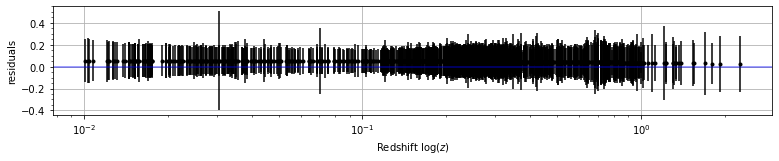

In [52]:
# plotting our residuals
plt.figure(figsize=[12.9,2])

# finding the residuals
resid = distance_modulus_LCDM(x, H0, Om) - distance_modulus_LCDM(x, H0_emcee, Om_emcee)

plt.axhline(0, c = 'blue', alpha = 0.5)
plt.errorbar(x = x, y = resid, yerr= data['dmb'], fmt = '.', c = 'black')

plt.minorticks_on()
plt.grid()
plt.xscale('log')
plt.xlabel('Redshift $\log(z)$')
plt.ylabel('residuals')
plt.savefig('lcdm_resid.png')
plt.show()

We can note that the residuals for our ***emcee fit*** are consistantly above 0, to the value of $\Delta \approx 0.05$. This is caused by our measurement of the Hubble Constant $H_0$. Using the data from Supernovea alone is not an acurate way to measure the Hubble Constant as it changes significantly over redshift. If we had a larger sample of supernovea across a wider range of redshift, that would give a better result for $H_0$. Until then, we can ignore the fitted $H_0$ result and assume it is the known result of 69.8 km/sec/Mpc

In [53]:
from IPython.display import display, Math

# Printing out H0 and Omega_M
for i in range(ndim):
    mcmc = np.percentile(flat_samples[:, i], [16, 50, 84])
    q = np.diff(mcmc)
    txt = "\mathrm{{{3}}} = {0:.3f}_{{-{1:.3f}}}^{{{2:.3f}}}"
    txt = txt.format(mcmc[1], q[0], q[1], labels[i])
    display(Math(txt))

# Printing out Omega_Lambda
mcmc = np.percentile(flat_samples[:, 1], [16, 50, 84])
q = np.diff(mcmc)
txt = "\mathrm{{{3}}} = {0:.3f}_{{-{1:.3f}}}^{{{2:.3f}}}"
txt = txt.format(1-mcmc[1], q[0], q[1], 'Ol')
display(Math(txt))


# finding our chi-squared value
H0_emcee = np.percentile(flat_samples[:, 0], [50])
Om_emcee = np.percentile(flat_samples[:, 1], [50])

emcee_chi = chi_squared(distance_modulus_LCDM, DM, data['dmb'], [data['zcmb'], H0_emcee[0], Om_emcee])
print('\nOur Chi-Squared value for our emcee fit is:')
print('X^2:',round(emcee_chi,4))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>


Our Chi-Squared value for our emcee fit is:
X^2: 1035.6808
